# Notebook activity 4.11 Multiple covariates and factors with interactions in R

In Notebook activity 4.10, we modelled the response `hourlyWageSqrt` (the square root of the individual's hourly wage, in £) from the wages dataset (Subsection 1.1, Unit 3) using two covariates (`workHrs` and `educAge`) and two factors (`gender` and `computer`) as the explanatory variables. In that notebook activity, we assumed that there were no interactions between any of the explanatory variables. 

In this notebook activity, we will consider the same response and explanatory variables, but this time we will include interactions between the explanatory variables. 

As a reminder, the explanatory variables are as follows.

* `workHrs`: the average number of hours the individual works each week
* `educAge`: the age, in years, at which the individual ceased education
* `gender`: the gender the individual identifies with, taking the values male and female
* `computer`: whether the individual has access to a computer at home, taking the values yes and no.

The data are stored in the `wages` data frame.

## (a) Getting started

### (i)

Start by loading the `M348` package, loading the `wages` data frame and checking that `wages` has loaded correctly, by running the following code.

In [ ]:
# Load the M348 package
library(M348)
# Load the wages data frame
data(wages)
# Check the data frame has loaded OK
head(wages)

## (b) Revisiting adding two-way interactions

In Notebook activity 4.8, we used command `lm(Y ~ A + B + A:B)` to fit a regression model for response $Y$ using two factors, $A$ and $B$, and their interaction $A$:$B$. This command can be written more simply as `lm(Y ~ A * B)`.

We use similar commands when fitting a model with multiple covariates and factors, together with their two-way interactions: we can either include each two-way interaction directly into the model (using the form `A:B`), or use a `*` to simplify the command.

For example, suppose that we wish to fit a regression model for response $Y$ using two covariates, $x_1$ and $x_2$, and two factors, $A$ and $B$, and we wish to include all of the two-way interactions into the model. We can do this by adding the two-way interactions into the model separately using the following R command:

`lm(Y ~ x1 + x2 + A + B + x1:x2 + x1:A + x1:B + x2:A + x2:B + A:B)`.

This approach, however, can get rather fiddly and long-winded when there are a lot of explanatory variables!

An easier way to specify the model is to use the R command:

`lm(Y ~ (x1 + x2 + A + B) * (x1 + x2 + A + B))`.

Note that using this command will fit *all* of the two-way iteractions. If we only wanted to include a subset of these, then we would need to specify each of the required two-way interactions specifically, or we could make use of `*` for subsets of the variables. For example, we could add in the two-way interactions between $x_2$, $A$ and $B$ only by using the command:

`lm(Y ~ x1 + (x2 + A + B) * (x2 + A + B))`.

### (i)

Remove the `#` and adapt the code given below to fit a regression model for the response `hourlyWageSqrt` using as explanatory variables `workhrs`, `educAge`, `gender` and `computer`, together with all of the two-way interactions, storing an object called `wage2WayInteractionFit` and then producing a summary of the results.

In [2]:
# modelFit ~ lm(Y ~ (x1 + x2 + A + B)*(x1 + x2 + A + B))
# summary (modelFit)

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

In [3]:
wage2WayInteractionFit <- lm(hourlyWageSqrt ~ 
  (workHrs + educAge + gender + computer) * (workHrs + educAge + gender + computer), 
    data = wages)
summary(wage2WayInteractionFit)


Call:
lm(formula = hourlyWageSqrt ~ (workHrs + educAge + gender + computer) * 
    (workHrs + educAge + gender + computer), data = wages)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8797 -0.5887 -0.0567  0.5726  3.3516 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              5.2209909  0.2983951  17.497  < 2e-16 ***
workHrs                 -0.0381987  0.0067018  -5.700 1.30e-08 ***
educAge                 -0.0084243  0.0145646  -0.578  0.56303    
genderfemale            -1.9281632  0.2174529  -8.867  < 2e-16 ***
computerno              -1.2048492  0.1886751  -6.386 1.94e-10 ***
workHrs:educAge          0.0008145  0.0003291   2.475  0.01339 *  
workHrs:genderfemale     0.0300609  0.0033505   8.972  < 2e-16 ***
workHrs:computerno       0.0102890  0.0030596   3.363  0.00078 ***
educAge:genderfemale    -0.0061827  0.0085224  -0.725  0.46821    
educAge:computerno       0.0232385  0.0071933   3.231  0.00125 ** 
genderfemale:co

### (ii)

The first individual in the dataset is male and does not have a computer. He has a value of 39 for `workHours` and 22 for `educAge`. Obtain the fitted value, $\widehat{y}_1$, for this individual.

#### Solution <a class="tocSkip">

The required code and output are given below. So $\widehat{y}_1=3.95$  to two decimal places. 

Note that whilst the function is the same as you used in Notebook activity 4.10 part (b)(ii) to obtain the fitted value of the first individual, the resulting value is not because it is being applied to a different fitted model.

In [4]:
fitted.values(wage2WayInteractionFit)[1]

1 
3.952417

### (iii)

Explain how the `Coefficients` table you obtained part (i) can be used to calculate $\widehat{y}_1$? 

#### Solution <a class="tocSkip">

The individual takes level 1 of `gender` and level 2 of `computer`. So, when calculating the fitted value of `hourlyWageSqrt` for this individual, we won't include terms for the factor `gender` and the interactions `genderfemale`, `workHrs:genderfemale`, `educAge:genderfemale` and `genderfemale:computerno`. However, terms involving the factor `computer` *are* required when calculating the fitted value. We also need to include the covariates `workHrs`, $x_1$ (which takes the value 39 for this individual) and `educAge`, $x_2$ (which takes the value 22) and the interaction between them.

So, the fitted  value of `hourlyWageSqrt` for this individual can be calculated as:

\begin{equation*} \begin{align*}
\widehat{y}_{1} & = \{\text{baseline mean}\} +  \{\text{effect of no computer}\} + \beta_1 x_{11} + \beta_2 x_{12}+ + \gamma x_{11} x_{12}\\
 & \quad  + \{\text{interaction effect of $x_1$ and no computer}\}\times x_{11}\\
 & \quad + \{\text{interaction effect of $x_2$ and no computer}\}\times x_{12}\\
 & = 5.2209909 -1.204892 + (-0.0381987 \times 39) + (-0.0084243 \times 22) \\
 & \quad + (0.0008145 \times 39 \times 22) + (0.0102890 \times 39) + (0.0232385 \times 22)\\
 & = 5.2209909 -1.204892 - 1.4897493 -0.1853346 + 0.698841 +0.401271 + 0.511247\\
 & = 3.952374  \simeq 3.95.
\end{align*} \end{equation*}

## (c) Adding higher-order interactions

In order to fit a model with higher-order interactions, we can add in each one separately, or we can again make use of `*` to simplify the command. 

For example, when fitting a regression model for response $Y$ using two covariates $x_1$ and $x_2$, two factors $A$ and $B$, together with *all* their interactions (two-way, three-way and four-way), we can use the R command:

`lm(Y ~ x1 * x2 * A * B)`.

As higher order interactions are added to a model, the model gets increasingly complicated. Carrying out a stepwise regression procedure can therefore be helpful to identify exactly which explanatory variables and interactions should be included in the model, before we explore the selected model further. Note that, R automatically uses the hierarchical principle mentioned in Box 15, Subsection 6.3, Unit 4.

### (i)

Run the code below to fit both the null model and the full model, and then carry out a stepwise regression procedure in both directions between these two models, saving results from fitting the chosen model in an object called `wageChosenModel`. Which model does the procedure choose?

In [ ]:
# Fit the null model
wageNullModel <- lm(hourlyWageSqrt ~ 1, data = wages)

# Fit the full model with all explanatory variables and their interactions
wageFullModel <- lm(hourlyWageSqrt ~ workHrs * educAge * gender * computer, 
                    data = wages)

# Carry out a stepwise regression procedure between the null and full models
#    in both directions 
wageChosenModel <- step(wageFullModel, direction = "both", 
     scope = list(lower = wageNullModel, upper = wageFullModel))

#### Solution <a class="tocSkip">

The model chosen by the stepwise regression procedure is given at the end of the output for the procedure. 
The chosen model is:

`hourlyWageSqrt ~ workHrs + educAge + gender + computer + 
    workHrs:educAge + workHrs:gender + educAge:gender + workHrs:computer + 
    educAge:computer + gender:computer + workHrs:educAge:computer + 
    educAge:gender:computer`
    
So, the chosen model contains all four of the individual explanatory variables, all six of the two-way interactions and two of the three-way interactions.

## (d) Checking the chosen model

Now that the stepwise regression procedure has chosen a model for us, we can check the assumptions of the model.

### (i)

Use the empty code cell below to produce the residual plot and the normal probability plot for the model chosen in part (c)(i) by stepwise regression. 

#### Solution <a class="tocSkip">

The required code and resulting plots are given below

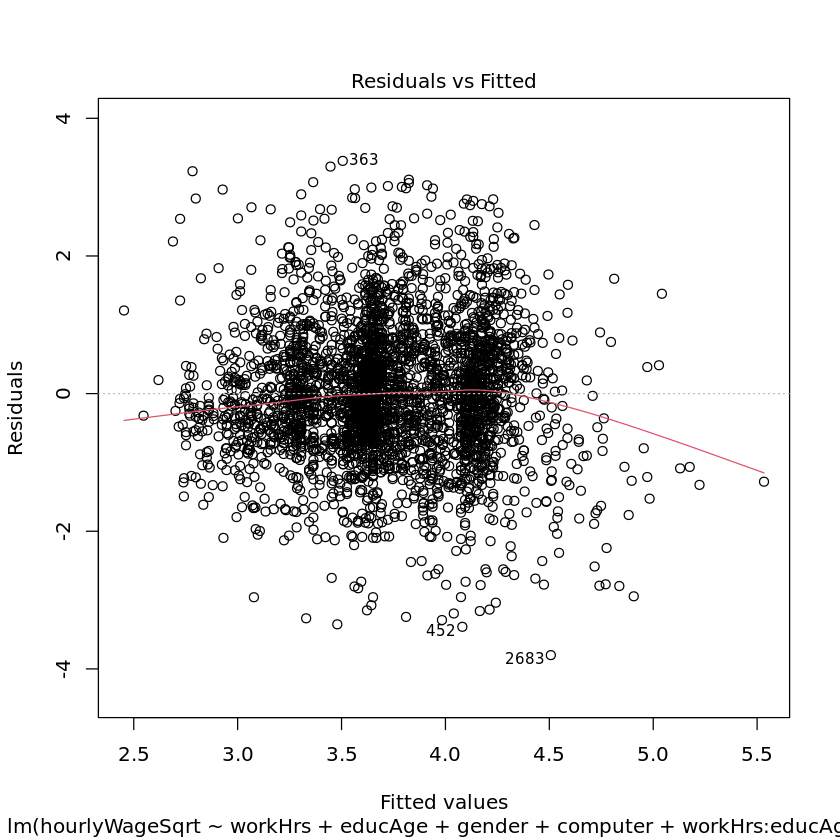

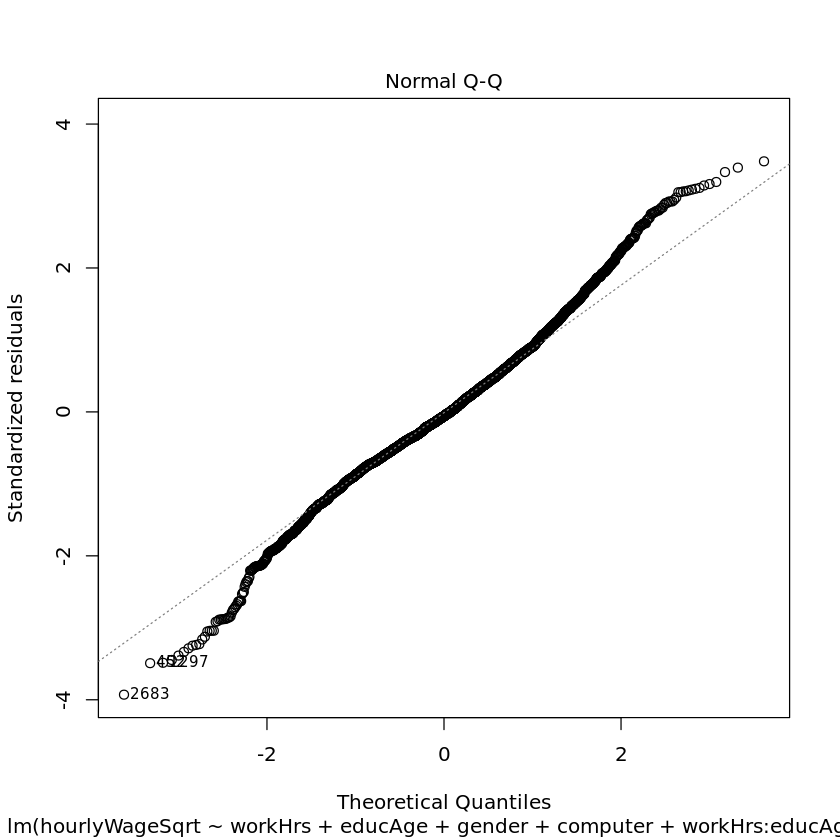

In [6]:
plot(wageChosenModel, 1)
plot(wageChosenModel, 2)

### (ii)

Do either of the plots you produced in part (i) suggest any problems with the assumptions for the chosen model? Why or why not?

#### Solution <a class="tocSkip">

In the residual plot, there is a hint of curvature. This is, however, only seen towards the small and high fitted values, and so, on balance we (the module team) would say that the assumption of zero mean is reasonable. 

The assumption of constant variance also seems reasonable, since the residuals seem to be fairly evenly spread across both the residual plot.

However, the normal probability plot deviates from the line systematically for both large and small residual values, which means that the assumption of normality may be questionable.